## Metropolis Monte Carlo Part 3
### Lexin Chen

$V_3(x) = -Ae^{-\cfrac{(x+3)^2}{\sigma_1^2}} - Be^{-\cfrac{(x-3)^2}{\sigma_2^2}}$ in kcal/mol with $A=B=10$ and $\sigma_1=\sigma_2=1$ in the range -10 to 10

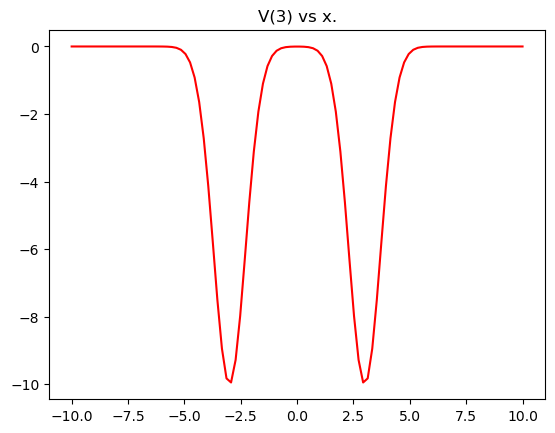

In [4]:
import matplotlib.pyplot as plt
import numpy as np
De = 10
a = 0.31
x0 = 5
x = np.linspace(-10, 10, 100)
def V3(x):
    return - 10 * np.exp(-(x + 3) ** 2) - 10 * np.exp(-(x - 3) ** 2)

plt.title("V(3) vs x.")
plt.plot(x, V3(x),color='red')

- Determine the position of the barrier between the two minima, which will be called xbarrier. 
- Compute P(left)=probability of being between from -10 to xbarrier and P(right)=from xbarrier to +10. Do this for T=100K, 300K and 1000K.

In [32]:
import scipy.integrate
from numpy import exp
import matplotlib.pyplot as plt
import numpy as np
import random
import math 

t1 = 100 
t2 = 300
t3 = 1000
k = 1
kB = 8.314e-3
list = np.arange(-10,10,.1)

x_range = np.arange(-3, 0.01, 0.0001)
V3_range = np.array([V3(x) for x in x_range])
x_barrier = x_range[np.argmax(V3_range)]
print('x(barrier)=' + str(x_barrier))

f= lambda x: exp(-(-10 * exp(-(x + 3) ** 2) - 10 * exp(-(x - 3) ** 2)) / kB / t1) 
j = scipy.integrate.quad(f, -10, 10)
a = scipy.integrate.quad(f, -10, x_barrier)
print('At 100K, P(left)=' + str(a[0] / j[0]))
print('At 100K, P(right)=' + str(1-(a[0] / j[0])))
p1 = []
for i in list:
  num = math.pow(math.e,-(- 10 * exp(-(i + 3) ** 2) - 10 * exp(-(i - 3) ** 2)) / (kB * t1)) #p(x)=e^(-v(x)/kBT)
  p1.append(num / j[0])

p2 = []
f= lambda x:exp(-(- 10 * exp(-(x + 3) ** 2) - 10 * exp(-(x - 3)**2)) / kB / t2) 
j = scipy.integrate.quad(f, -10, 10)
a = scipy.integrate.quad(f, -10, x_barrier)
print('At 300K, P(left)=' + str(a[0] / j[0]))
print('At 300K, P(right)=' + str(1-(a[0] / j[0])))
for i in list:
  num1 = math.pow(math.e,-(- 10 * exp(-(i + 3) ** 2) - 10 * exp(-(i - 3) ** 2))/(kB * t2)) #p(x)=e^(-v(x)/kBT)/integral of same thing
  p2.append(num1 / j[0])

p3 = []
def f(x):
 return exp(-(-10 * exp(-(x + 3) ** 2) - 10 * exp(-(x - 3) ** 2)) / kB / t3) 
j = scipy.integrate.quad(f, -10, 10)
#print(f(-6),j[0],f(-6)/j[0])
a = scipy.integrate.quad(f, -10, x_barrier)
print('At 1000K, P(left)=' + str(a[0] / j[0]))
print('At 1000K, P(right)=' + str(1 - (a[0] / j[0])))
for i in list:
  num2 = math.pow(math.e, -(-10 * exp(-(i + 3) ** 2) - 10 * exp(-(i - 3) ** 2)) / (kB * t3)) #p(x)=e^(-v(x)/kBT)
  p3.append(num2 / j[0])

x(barrier)=6.330935775622493e-12
At 100K, P(left)=0.5000000000000004
At 100K, P(right)=0.49999999999999956
At 300K, P(left)=0.5000000000000503
At 300K, P(right)=0.4999999999999497
At 1000K, P(left)=0.5000000000002357
At 1000K, P(right)=0.4999999999997643


Compute and plot $P(x)$ for $V_1$ above, assuming a Boltzmann distribution at three temperatures, 100K, 300K and 1000K. With the specifics in the above code.

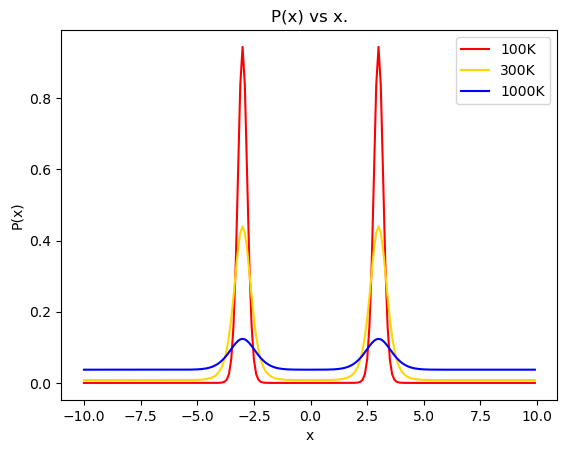

In [33]:
plt.title("P(x) vs x.")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.plot(list, p1, color='red', label='100K')
plt.plot(list, p2, color='gold', label='300K')
plt.plot(list, p3, color='blue', label='1000K')
plt.legend()

Compute $\langle x \rangle$. Dividing Second integral by first integral.

0.0 / 177187.14727303266
0.0 / 125.33247812606233
0.0 / 26.865551347698194


C:\Users\le.chen\AppData\Local\Temp\ipykernel_13936\2221449030.py:20: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  k2 = scipy.integrate.quad(g, -10, 10)


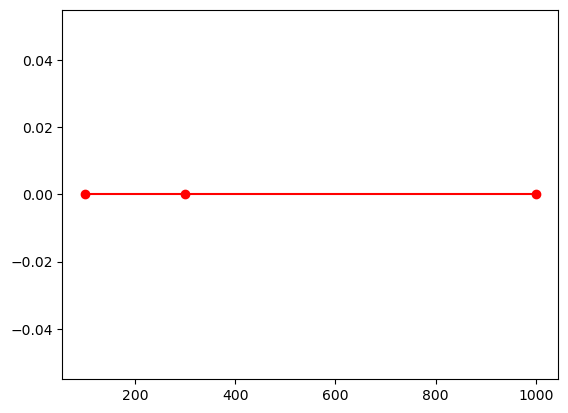

In [11]:
import scipy.integrate
from numpy import exp
import matplotlib.pyplot as plt
import numpy as np
import random
import math

t1 = 100 
t2 = 300
t3 = 1000
k = 1
kB = 8.314e-3
average = []

for n in [t1, t2, t3]:
  def f(x):
    return exp((+ 10 * exp(-(x + 3) ** 2) + 10 * exp(-(x - 3) ** 2)) / kB / n)
  g = lambda x: x * exp((+ 10 * exp(-(x + 3) ** 2) + 10 * exp(-(x - 3) ** 2)) / kB / n)
  k1 = scipy.integrate.quad(f, -10, 10)
  k2 = scipy.integrate.quad(g, -10, 10)
  print('{} / {}'.format(k2[0], k1[0]))

  average.append(k2[0] / k1[0])
plt.plot([t1, t2, t3], average, '-or', label='Averages')
plt.show()

Compute $\langle x^2 \rangle$. Dividing Second integral by first integral.

1603789.01986115 / 177187.14727303266
1635.4337196211009 / 125.33247812606233
731.1639722098929 / 26.865551347698194


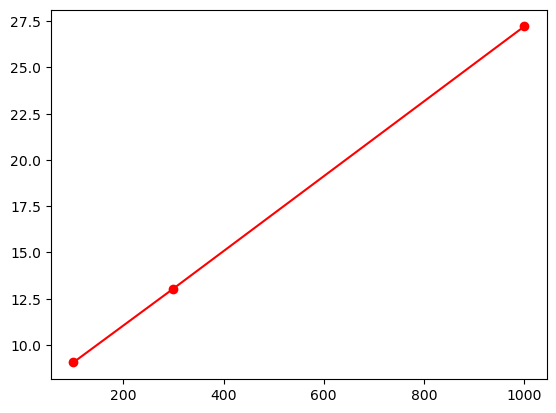

In [12]:
import scipy.integrate
from numpy import exp
import matplotlib.pyplot as plt
import numpy as np
import random
import math 
t1=100 
t2=300
t3=1000
k=1
kB=8.314e-3
average = []

for n in [t1, t2, t3]:
  def f(x):
    return exp((+ 10 * exp(-(x + 3)**2) + 10 * exp(-(x - 3)**2)) / kB / n)
  g = lambda x: x ** 2 * exp((+ 10 * exp(-(x + 3)**2) + 10 * exp(-(x - 3)**2)) / kB / n)
  k1 = scipy.integrate.quad(f, -10, 10)
  k2 = scipy.integrate.quad(g, -10, 10)
  print('{} / {}'.format(k2[0], k1[0]))

  average.append(k2[0] / k1[0])
plt.plot([t1, t2, t3], average, '-or', label='Averages')
plt.show()

Compute $\langle V_3\rangle$. 

-846069.0496718953 / 88593.57363651633
-468.872079132496 / 62.66623906303115
-43.648210373001476 / 13.432775673849095


<function matplotlib.pyplot.show(close=None, block=None)>

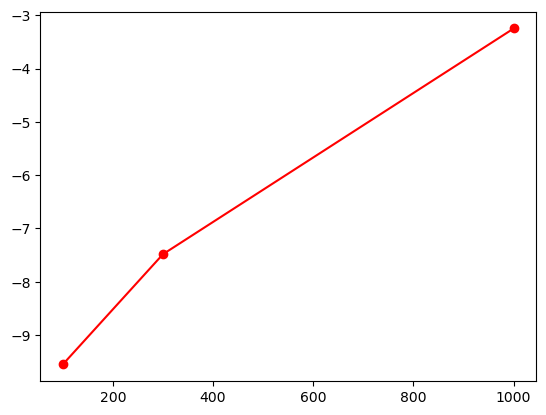

In [15]:
#5f , <V1>
V1 = []
#V1.clear()
for n in [t1, t2, t3]:
  def f(x):
    return exp((+ 10 * exp(-(x + 3) ** 2) + 10 * exp(-(x - 3) ** 2)) / kB / n)
  g = lambda x: (-10 * exp(-(x + 3) ** 2) - 10 * exp(-(x - 3) ** 2)) \
                * exp((+ 10 * exp(-(x + 3) ** 2) + 10 * exp(-(x - 3)**2)) / kB / n)
  k1 = scipy.integrate.quad(f, 0, 10)
  k2 = scipy.integrate.quad(g, 0, 10)
  print('{} / {}'.format(k2[0], k1[0]))

  V1.append(k2[0] / k1[0])
plt.plot([t1, t2, t3], V1, '-or', label='Averages')
plt.show

### Metropolis Monte Carlo python program to sample the Boltzmann distribution for $V_3$.
Discard first 10% of accepted moves.

$P(x)$ at 100K

Total Steps: 99000
Accept: 7083 + Reject: 92917


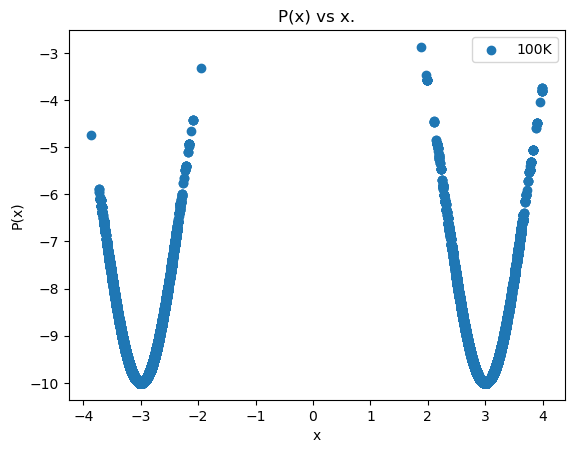

In [46]:
import random
import math
import matplotlib.pyplot as plt
kB = 8.314e-3 # R constant
T = 100
k = 1
def V1(x):
    "# defining equation for boltzmann distribution"
    return - 10 * exp(-(x + 3) ** 2) - 10 * exp(-(x - 3) ** 2) 

old_num = random.uniform(-10, 10) # picking a random number between 0 to 10
steps_list6 = [] # creating a list for all the steps partook
eng_list6 = [] # list of corresponding energies

D = 5 # defining the range that it shall move along the x-axis
delta_x = random.uniform(-D, D)
num = old_num + delta_x # moving the old_num along some value

while num < -10 or num > 10:
  delta_x = random.uniform(-D, D)
  num = old_num + delta_x

accept = False
nreject=0
naccept=0

# Automatically accept if the energy goes down
for i in range(100000): # defining the # of bins
  new_energy=V1(num) # calculate the new energy
  old_energy=V1(old_num)
  
  dE = new_energy - old_energy 
  if (dE <= 0): 
    accept = True # accept the move if the difference between old and energy energy is less than 0
    
  else:
    # Now apply the Monte Carlo test - compare
    # exp( -(E_new - E_old) / kT ) >= rand(0,1)
    x = math.exp(-(dE) / (kB * T) )
    if (x >= random.uniform(0.0, 1.0)):
      accept = True   
    else:
      accept = False
      
  if accept == True:
    naccept += 1 # if move accepted +1
    eng_list6.append(new_energy) 
    steps_list6.append(num)
    old_num = num # replace the num as old_num so it can go into the loop again with an updated number
    old_energy = new_energy
  else:
    nreject += 1 # reject the move - restore the old number
    eng_list6.append(old_energy)
    steps_list6.append(old_num)

  delta_x = random.uniform(-D, D) # move again
  num = old_num + delta_x
  while num < -10 or num > 10:
    delta_x = random.uniform(-D, D)
    num = old_num + delta_x

T = 100
V1 = lambda x: math.pow(math.e, (-k * (x - 5) ** 2) / kB / T)

steps_list6 = steps_list6[1000:] # remove of first 10% of steps
eng_list6 = eng_list6[1000:] # remove of first 10% of energies
print(f"Total Steps: {len(eng_list6)}") #proofs that first 10% of the numbers were discarded
print('Accept: {} + Reject: {}'.format(naccept, nreject))

plt.title("P(x) vs x.")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.scatter(steps_list6,eng_list6,label='100K')
plt.legend()

Probability Density at 300K.

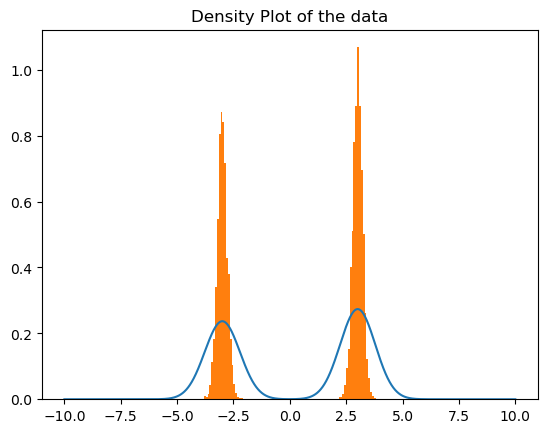

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


prob_density = gaussian_kde(steps_list6)
prob_density.covariance_factor = lambda : .25
prob_density._compute_covariance()

x = np.linspace(-10, 10, 10000)
y = prob_density(x)

plt.plot(x, y)
plt.title("Density Plot of the data")
plt.hist(steps_list6, bins=100, density=True)
plt.show()

Compute P(left)=probability of being between from -10 to xbarrier and P(right)=from
xbarrier to +10 at 100K.

In [34]:
x_range = np.arange(-3, 0.01, 0.0001)
V3_range = np.array([V3(x) for x in x_range])
x_barrier = x_range[np.argmax(V3_range)]
print('x(barrier)=' +str(x_barrier))

f= lambda x:prob_density(x)
j = scipy.integrate.quad(f, -10, x_barrier)
print('At 100K, P(left)=' + str(j[0]))
print('At 100K, P(right)=' + str(1-(j[0])))

x(barrier)=6.330935775622493e-12
At 100K, P(left)=0.4641637952833339
At 100K, P(right)=0.535836204716666


total steps: 99000
Accept: 26595 + Reject: 73405


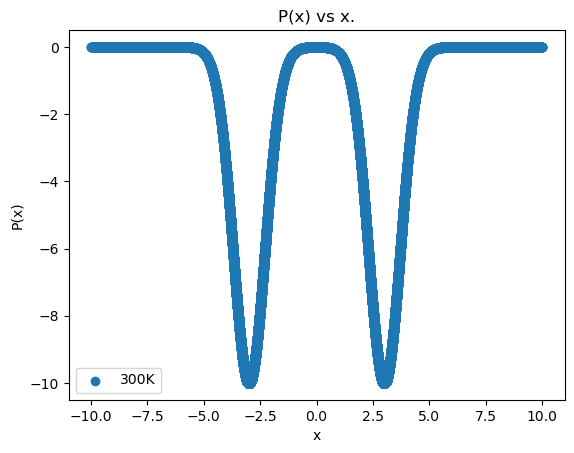

In [47]:
import random
import math
import matplotlib.pyplot as plt
kB = 8.314e-3 # R constant
T = 300
k = 1
def V1(x):
    " defining equation for boltzmann distribution"
    return - 10 * exp(-(x + 3) ** 2) - 10 * exp(-(x - 3) ** 2)

old_num = random.uniform(-10,10) # picking a random number between 0 to 10
steps_list7 =[] # creating a list for all the steps partook
eng_list7 = [] # list of corresponding energies

D = 5 # defining the range that it shall move along the x-axis
delta_x = random.uniform(-D, D)
num = old_num + delta_x # moving the old_num along some value

while num < -10 or num > 10:
  delta_x = random.uniform(-D, D)
  num = old_num + delta_x

accept = False
nreject = 0
naccept = 0

# Automatically accept if the energy goes down
for i in range(100000): # defining the # of bins

  new_energy = V1(num) # calculate the new energy
  old_energy = V1(old_num)
  
  dE = new_energy - old_energy 
  if (dE <= 0): 
    accept = True # accept the move if the difference between old and energy energy is less than 0
    
  else:
    # Now apply the Monte Carlo test - compare
    # exp( -(E_new - E_old) / kT ) >= rand(0,1)
    x = math.exp(-(dE) / (kB * T) )
    if (x >= random.uniform(0.0, 1.0)):
      accept = True
      
    else:
      accept = False
      
  if accept == True:
    naccept += 1 # if move accepted +1
    eng_list7.append(new_energy) 
    steps_list7.append(num)
    old_num = num # replace the num as old_num so it can go into the loop again with an updated number
    old_energy = new_energy
  else:
    nreject += 1 # reject the move - restore the old number
    eng_list7.append(old_energy)
    steps_list7.append(old_num)

  delta_x = random.uniform(-D, D) # move again
  num = old_num + delta_x
  while num < -10 or num > 10:
    delta_x = random.uniform(-D, D)
    num = old_num + delta_x

T = 300
V1 = lambda x: math.pow(math.e, (-k * (x - 5) ** 2) / kB / T)

steps_list7 = steps_list7[1000:] # remove first 10% of steps
eng_list7 = eng_list7[1000:] # remove first 10% of energies
print(f"total steps: {len(eng_list7)}") # proofs that first 10% of the numbers were discarded
print('Accept: {} + Reject: {}'.format(naccept, nreject))

plt.title("P(x) vs x.")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.scatter(steps_list7, eng_list7, label='300K')
plt.legend()

Probability Density at 300K.

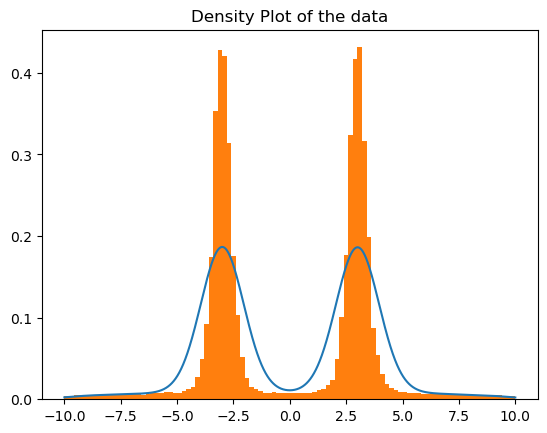

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

prob_density = gaussian_kde(steps_list7)
prob_density.covariance_factor = lambda : .25
prob_density._compute_covariance()

x = np.linspace(-10, 10, 10000)
y=prob_density(x)

plt.plot(x, y)
plt.title("Density Plot of the data")
plt.hist(steps_list7, bins=100, density=True)
plt.show()

Compute P(left)=probability of being between from -10 to xbarrier and P(right)=from
xbarrier to +10 at 300K.

In [39]:
#6e - 300K
x_range = np.arange(-3, 0.01, 0.0001)
V3_range = np.array([V3(x) for x in x_range])
x_barrier = x_range[np.argmax(V3_range)]
print('x(barrier)=' +str(x_barrier))

f= lambda x:prob_density(x)
j = scipy.integrate.quad(f, -10, x_barrier)
print('At 300K, P(left)=' + str(j[0]))
print('At 300K, P(right)=' + str(1-(j[0])))

x(barrier)=6.330935775622493e-12
At 300K, P(left)=0.4982420907534849
At 300K, P(right)=0.5017579092465151


total steps: 99000
Accept: 78126 + Reject: 21874


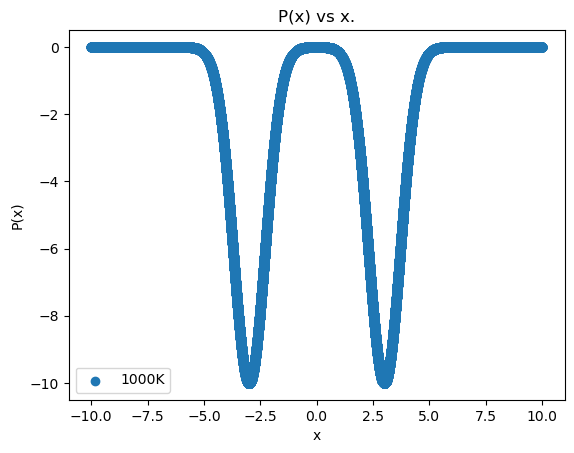

In [48]:
import random
import math
import matplotlib.pyplot as plt
kB = 8.314e-3 # R constant
T = 1000
k = 1

def V1(x):
  return - 10 * exp(-(x + 3) ** 2) - 10 * exp(-(x - 3) ** 2)

old_num = random.uniform(0,10) # picking a random number between 0 to 10
steps_list8 =[] # creating a list for all the steps partook
eng_list8 = [] # list of corresponding energies

D = 5 # defining the range that it shall move along the x-axis
delta_x = random.uniform(-D, D)
num = old_num + delta_x # moving the old_num along some value

while num < -10 or num > 10:
  delta_x = random.uniform(-D, D)
  num = old_num + delta_x

accept = False
nreject = 0
naccept = 0

# Automatically accept if the energy goes down
for i in range(100000): # defining the # of bins

  new_energy = V1(num) # calculate the new energy
  old_energy = V1(old_num)
  
  dE = new_energy - old_energy 
  if (dE <= 0): 
    accept = True # accept the move if the difference between old and energy energy is less than 0
    
  else:
    # Now apply the Monte Carlo test - compare
    # exp( -(E_new - E_old) / kT ) >= rand(0,1)
    x = math.exp( -(dE) / (kB * T) )
    #print(x)
    if (x >= random.uniform(0.0, 1.0)):
      accept = True
      
    else:
      accept = False
      
  if accept == True:
    naccept += 1 # if move accepted +1
    eng_list8.append(new_energy) 
    steps_list8.append(num)
    old_num = num # replace the num as old_num so it can go into the loop again with an updated number
    old_energy = new_energy
  else:
    nreject += 1 # reject the move - restore the old number
    eng_list8.append(old_energy)
    steps_list8.append(old_num)

  delta_x = random.uniform(-D, D) # move again
  num = old_num + delta_x
  while num < -10 or num > 10:
    delta_x = random.uniform(-D, D)
    num = old_num + delta_x

T = 1000
V1 = lambda x: math.pow(math.e, (-k * (x - 5) ** 2) / kB / T)

steps_list8 = steps_list8[1000:] #get rid of first 10% of steps
eng_list8 = eng_list8[1000:] #get rid of first 10% of energies
print(f"total steps: {len(eng_list8)}") #proofs that first 10% of the numbers were discarded
print('Accept: {} + Reject: {}'.format(naccept, nreject))

plt.title("P(x) vs x.")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.scatter(steps_list8,eng_list8,label='1000K')
plt.legend()

Probability density at 1000K.

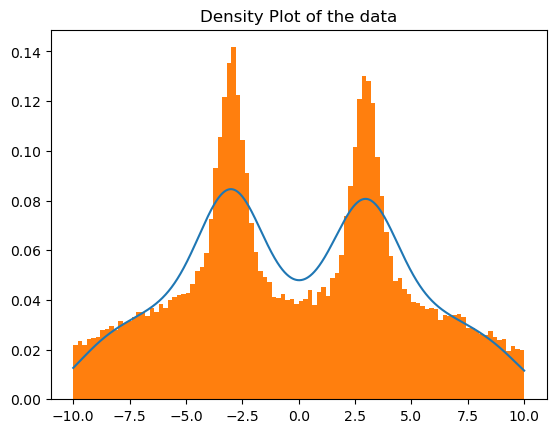

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

prob_density = gaussian_kde(steps_list8)
prob_density.covariance_factor = lambda : .25
prob_density._compute_covariance()

x = np.linspace(-10, 10, 10000)
y=prob_density(x)

plt.plot(x, y)
plt.title("Density Plot of the data")
plt.hist(steps_list8, bins=100, density=True)
plt.show()

Compute P(left)=probability of being between from -10 to xbarrier and P(right)=from
xbarrier to +10 at 1000K.

In [43]:
x_range = np.arange(-3,0.01, 0.0001)
V3_range = np.array([V3(x) for x in x_range])
x_barrier = x_range[np.argmax(V3_range)]
print('x(barrier)=' +str(x_barrier))

f= lambda x:prob_density(x)
j = scipy.integrate.quad(f, -10, x_barrier)
print('At 1000K, P(left)=' + str(j[0]))
print('At 1000K, P(right)=' + str(1-(j[0])))

x(barrier)=6.330935775622493e-12
At 1000K, P(left)=0.500547892104134
At 1000K, P(right)=0.499452107895866


Compute $\langle x\rangle$

<function matplotlib.pyplot.show(close=None, block=None)>

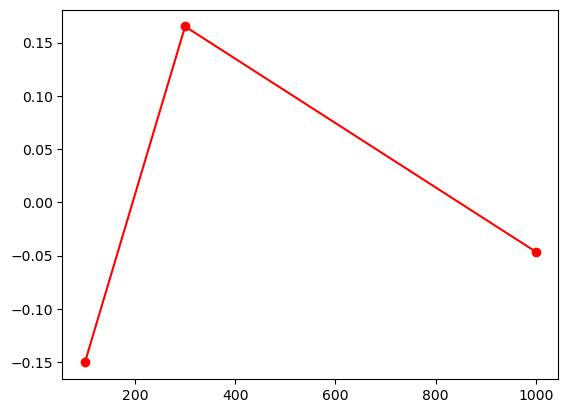

In [49]:
average = []
def cal_average(num):
    sum_num = 0
    for t in num:
        sum_num = sum_num + t           
    avg = sum_num / len(num)
    return avg
for i in [steps_list6, steps_list7, steps_list8]:
  average.append(cal_average(i))
plt.plot([t1, t2, t3], average, '-or', label='Averages')
plt.show

Compute $\langle x^2\rangle$

<function matplotlib.pyplot.show(close=None, block=None)>

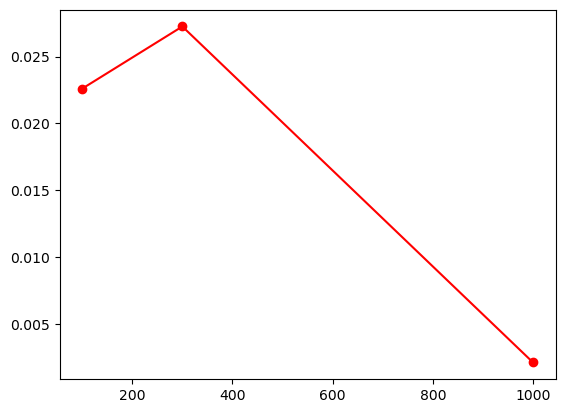

In [50]:
average1 = []
def cal_average(num):
    sum_num = 0
    for t in num:
        sum_num = sum_num + t           

    avg = sum_num / len(num)
    return avg ** 2
for i in [steps_list6,steps_list7,steps_list8]:
  average1.append(cal_average(i))
plt.plot([t1, t2, t3], average1, '-or', label='Averages')
plt.show

Compute $\langle V^3\rangle$

-811703.9531739424 / 88593.57363651633
-416.84938647656895 / 62.66623906303115
-34.354081470779526 / 13.432775673849095


<function matplotlib.pyplot.show(close=None, block=None)>

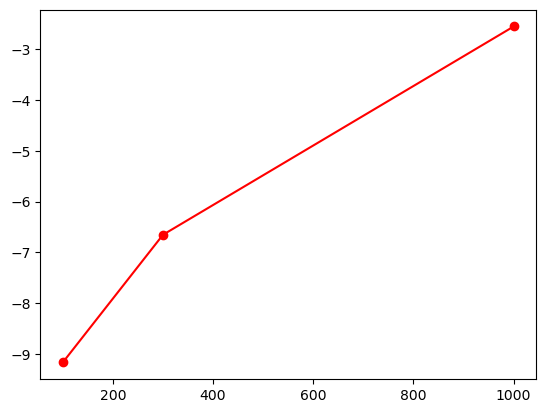

In [51]:
V1 = []
#V1.clear()
for n in [t1, t2, t3]:
  def f(x):
    return exp(-(- 10 * exp(-(x + 3)**2) - 10 * exp(-(x - 3)**2)) / kB / n) 
  g = lambda x: - 10 * exp(-(x + 3)**2) - 10 * exp(-(x - 3)**2) ** 2 * exp(-(- 10 * exp(-(x + 3)**2) - 10 * exp(-(x - 3)**2)) / kB / n)
  k1 = scipy.integrate.quad(f, 0, 10)
  k2 = scipy.integrate.quad(g, 0, 10)
  print('{} / {}'.format(k2[0], k1[0]))
  V1.append(k2[0] / k1[0])
plt.plot([t1, t2, t3], V1, '-or', label='Averages')
plt.show